In [258]:
import numpy as np
import matplotlib.pyplot as plt
from time import process_time


In [271]:
#A = np.array([[0,1,2,3,1,2,3,4],
#              [1,0,1,2,2,1,2,3],
#             [2,1,0,1,3,2,1,2],
#              [3,2,1,0,4,3,2,1],
#              [1,2,3,4,0,1,2,3],
#              [2,1,2,3,1,0,1,2],
#              [3,2,1,2,2,1,0,1],
#              [4,3,2,1,3,2,1,0]])
#RHS  = np.array([10,15,6,11,7,12,23,10])

A = np.array([[0,1,2,3,1,2,3,4],
              [1,0,1,2,2,1,2,3],
              [2,1,0,1,3,2,1,2],
              [3,2,1,0,4,3,2,1]])

RHS  = np.array([10,15,6,8])


row, col = A.shape

Utility  = np.array([1,5,2,4,1,3,4,3])

print(row)
print(col)

print(A)

4
8
[[0 1 2 3 1 2 3 4]
 [1 0 1 2 2 1 2 3]
 [2 1 0 1 3 2 1 2]
 [3 2 1 0 4 3 2 1]]


In [267]:
# Define a Objective function
def of(c,x):
  return sum(c*x)

def feasibility(a,b,x):
  Feasible = True
  for i in range(row):
    if sum(a[i]*x) > b[i]:
      Feasible = False
  return Feasible


def neigh_changeOne(x):
  print("input: \t", x)
  xx = x.copy() #copy the solution to preserve the original
  bestX = x.copy()
  bestOF = of(bestX,Utility)

  for i in range(col):
    xx[i] = (1-xx[i])
    if printAll: print("ChangeOne(",i, "): ", xx, "\tOF: ", of(xx,Utility), "\tFeasible: ", feasibility(A,RHS,xx))
    if feasibility(A,RHS,xx):
      Obj = of(xx,Utility)
      if(Obj > bestOF):
        bestX = xx.copy()
        bestOF = Obj
        print("*ChangeOne(",i, "):", xx, "\tOF: ", of(xx,Utility), "\tFeasible: ", feasibility(A,RHS,xx))
    xx[i] = (1-xx[i])

  return bestX, bestOF


input: 	 [0 0 0 0 0 0 0 0]
*ChangeOne( 0 ): [1 0 0 0 0 0 0 0] 	OF:  1 	Feasible:  True
*ChangeOne( 1 ): [0 1 0 0 0 0 0 0] 	OF:  5 	Feasible:  True
input: 	 [0 1 0 0 0 0 0 0]
*ChangeOne( 0 ): [1 1 0 0 0 0 0 0] 	OF:  6 	Feasible:  True
*ChangeOne( 2 ): [0 1 1 0 0 0 0 0] 	OF:  7 	Feasible:  True
*ChangeOne( 3 ): [0 1 0 1 0 0 0 0] 	OF:  9 	Feasible:  True
input: 	 [0 1 0 1 0 0 0 0]
*ChangeOne( 0 ): [1 1 0 1 0 0 0 0] 	OF:  10 	Feasible:  True
*ChangeOne( 2 ): [0 1 1 1 0 0 0 0] 	OF:  11 	Feasible:  True
*ChangeOne( 5 ): [0 1 0 1 0 1 0 0] 	OF:  12 	Feasible:  True
*ChangeOne( 6 ): [0 1 0 1 0 0 1 0] 	OF:  13 	Feasible:  True
input: 	 [0 1 0 1 0 0 1 0]
*ChangeOne( 0 ): [1 1 0 1 0 0 1 0] 	OF:  14 	Feasible:  True
*ChangeOne( 2 ): [0 1 1 1 0 0 1 0] 	OF:  15 	Feasible:  True
*ChangeOne( 5 ): [0 1 0 1 0 1 1 0] 	OF:  16 	Feasible:  True
input: 	 [0 1 0 1 0 1 1 0]
Elapsed time during the whole program in seconds: 0.011460199000012494


Text(0.5, 0, '# Round')

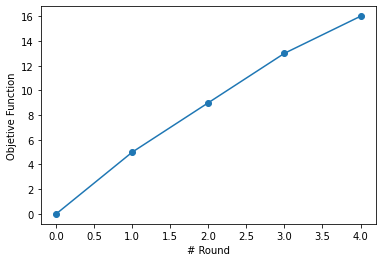

In [270]:
X0 = np.array([0,0,0,0,0,0,0,0])
bestX = X0.copy()
bestOF_ant = 0 

printAll = False

history = [0]

improvement = True

t1_start = process_time() 

while improvement:
  bestX, bestOF = neigh_changeOne(bestX)
  if bestOF > bestOF_ant:
    bestOF_ant = bestOF
    history.append(bestOF)
  else: 
    improvement = False

# Stop the stopwatch / counter
t1_stop = process_time()
      
print("Elapsed time during the whole program in seconds:",
                                         t1_stop-t1_start) 

plt.plot(history, "-o")
plt.ylabel('Objetive Function')
plt.xlabel('# Round')
#plt.annotate('local max', xy=(30, 16), xytext=(15, 16),
#             arrowprops=dict(facecolor='black', shrink=0.05),
#             )

